# Find Teleconnections (precursor regions) via correlation maps 

In [27]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI, functions_pp
from IPython.display import Image
import numpy as np

/Users/semvijverberg/surfdrive/Scripts/RGCPD
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# define input: 
path_test = os.path.join(main_dir, 'data') # path of test data
# format list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
list_of_name_path = [(3, os.path.join(path_test, 'tf5_nc5_dendo_80d77.nc')),
                    ('sst', os.path.join(path_test,'sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc'))]

# Time-handling seasonal mode (DJF)

In [3]:
# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                           alpha=.01, FDR_control=True, 
                           lags=np.array([['09-01', '11-30']]), # <- selecting time periods to aggregate
                           distance_eps=700, min_area_in_degrees2=5)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=None, # <- seasonal forecasting mode, set tfreq to None! 
           start_end_TVdate=('02-28', '12-01'), # <- defining DJF target period 
           path_outmain=os.path.join(main_dir,'data'))

rg.pp_TV(TVdates_aggr=True) # <- start_end_TVdate defineds aggregated over period

sorting latitude


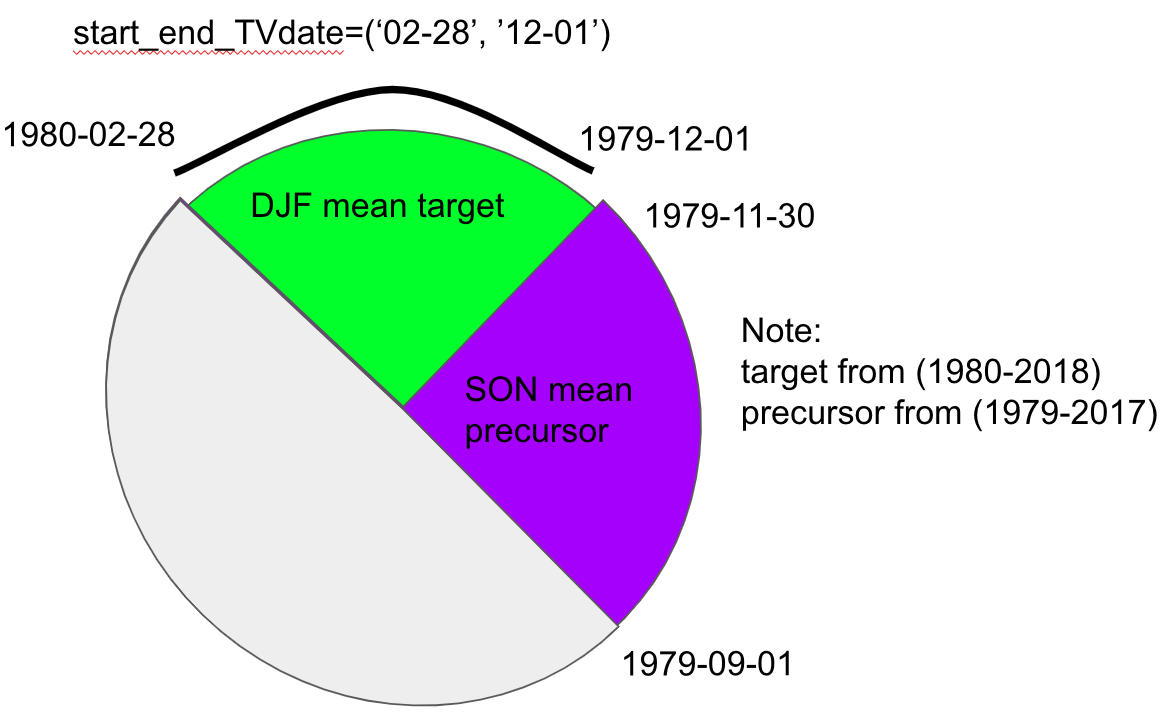

In [4]:
Image(filename = "./data/seasonal_mode_DJF.png", width = 600, height = 300)

In [5]:
# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                           alpha=.05, FDR_control=True, 
                           lags=np.array([['06-01', '08-31'], ['01-01', '05-31']]), # <- selecting time-mean-periods
                           distance_eps=700, min_area_in_degrees2=4)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=None, # <- seasonal forecasting mode, set tfreq to None! 
           start_end_TVdate=('06-01', '08-31'), # <- defining JJA target period 
           path_outmain=os.path.join(main_dir,'data'))

rg.pp_TV(TVdates_aggr=True) # <- start_end_TVdate defineds aggregated over period

sorting latitude


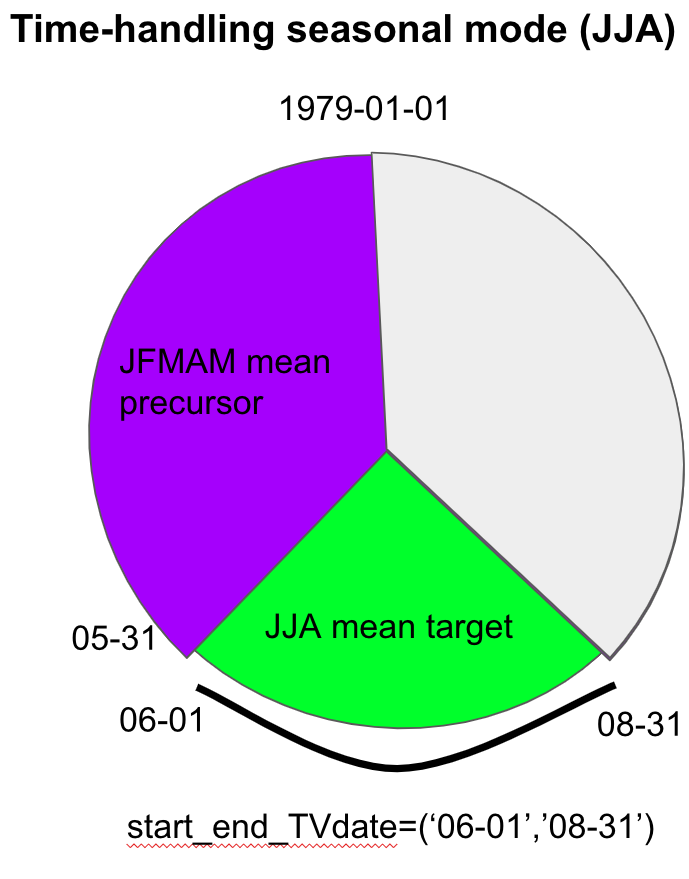

In [6]:
# for lag period ['01-01', '05-31']
Image(filename = "./data/seasonal_mode_JJA.png", width = 400, height = 200)

Some notes on data input:
- Works for both monthly and daily data. If loading in monthly data, the exact same reasoning is followed.
- If loading one-value-per-year target (such as annual crop yield), one can choose to go into 'subseasonal mode' by selecting ext_annual_to_mon=True in RGCPD.pp_TV(). See subseasonal_mode.ipynb. Default is to stay in seasonal mode. 

sorting latitude
Plotting Corr maps xrclustered, split 0, lag 0


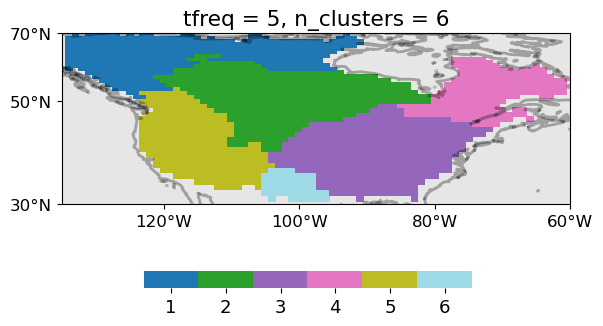

In [7]:
# if TVpath contains the xr.DataArray that is clustering beforehand, we can have a look at the spatial regions.
rg.plot_df_clust()


Performing pre-processing sst
sorting latitude
applying rolling mean, beware: memory intensive
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years

Visual test latlon 37 197

/Users/semvijverberg/miniconda3/envs/RGCPD1/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)




Detrending ...
Visual test latlon 37 212
writing ncdf file to:
/Users/semvijverberg/surfdrive/Scripts/RGCPD/data/preprocessed/sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc


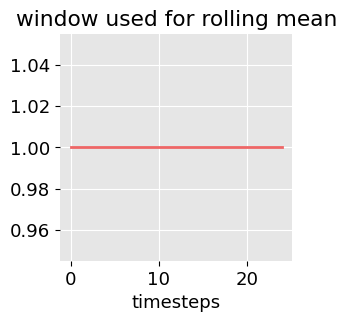

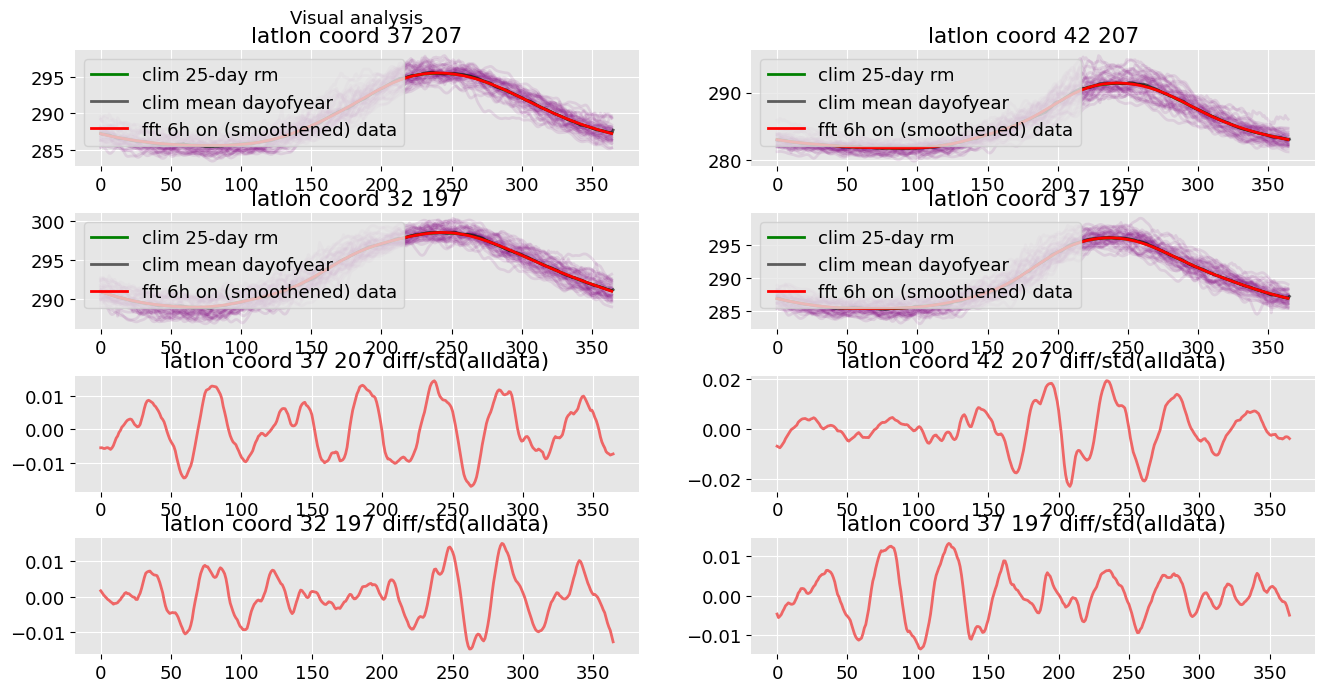

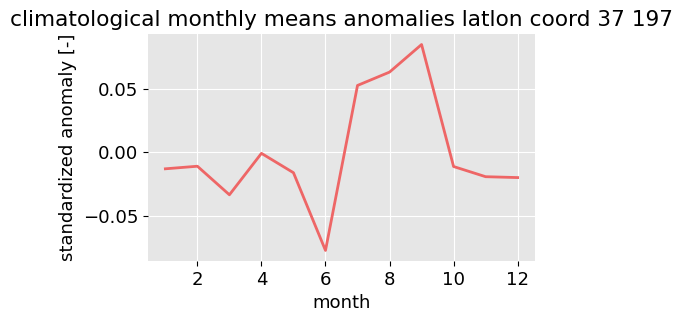

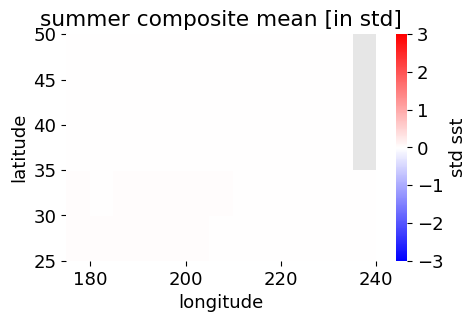

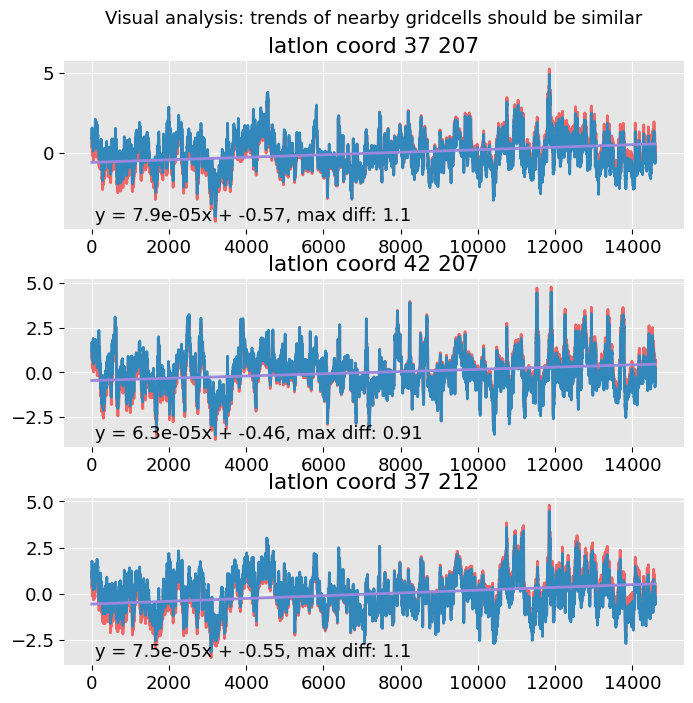

In [8]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

In [9]:
rg.fulltso

<xarray.DataArray '3ts' (time: 14600)>
array([ -2.664228,  -9.34189 , -11.166506, ...,  -3.134443,   1.409413,
         4.678773])
Coordinates:
    tfreq       int64 ...
    n_clusters  int64 ...
    cluster     int64 3
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31

In [10]:
rg.traintest(method='random_5')

In [11]:
rg.calc_corr_maps() 

[1979 2018] ('06-01', '08-31')
[1979 2018] ('01-01', '05-31')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(32dp, 80%)



Plotting Corr maps sst, split 0, lag 0
Plotting Corr maps sst, split 0, lag 1


/Users/semvijverberg/miniconda3/envs/RGCPD1/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


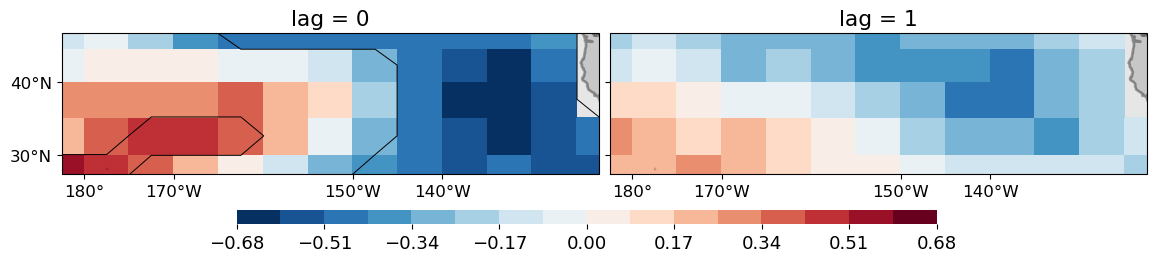

In [12]:
rg.plot_maps_corr()

In [13]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 0, lag 0
Plotting Corr maps sst_labels_init, split 1, lag 0
Plotting Corr maps sst_labels_init, split 2, lag 0
Plotting Corr maps sst_labels_init, split 3, lag 0
Plotting Corr maps sst_labels_init, split 4, lag 0
Plotting Corr maps sst_labels_init, split 0, lag 1
Plotting Corr maps sst_labels_init, split 1, lag 1
Plotting Corr maps sst_labels_init, split 2, lag 1
Plotting Corr maps sst_labels_init, split 3, lag 1
Plotting Corr maps sst_labels_init, split 4, lag 1


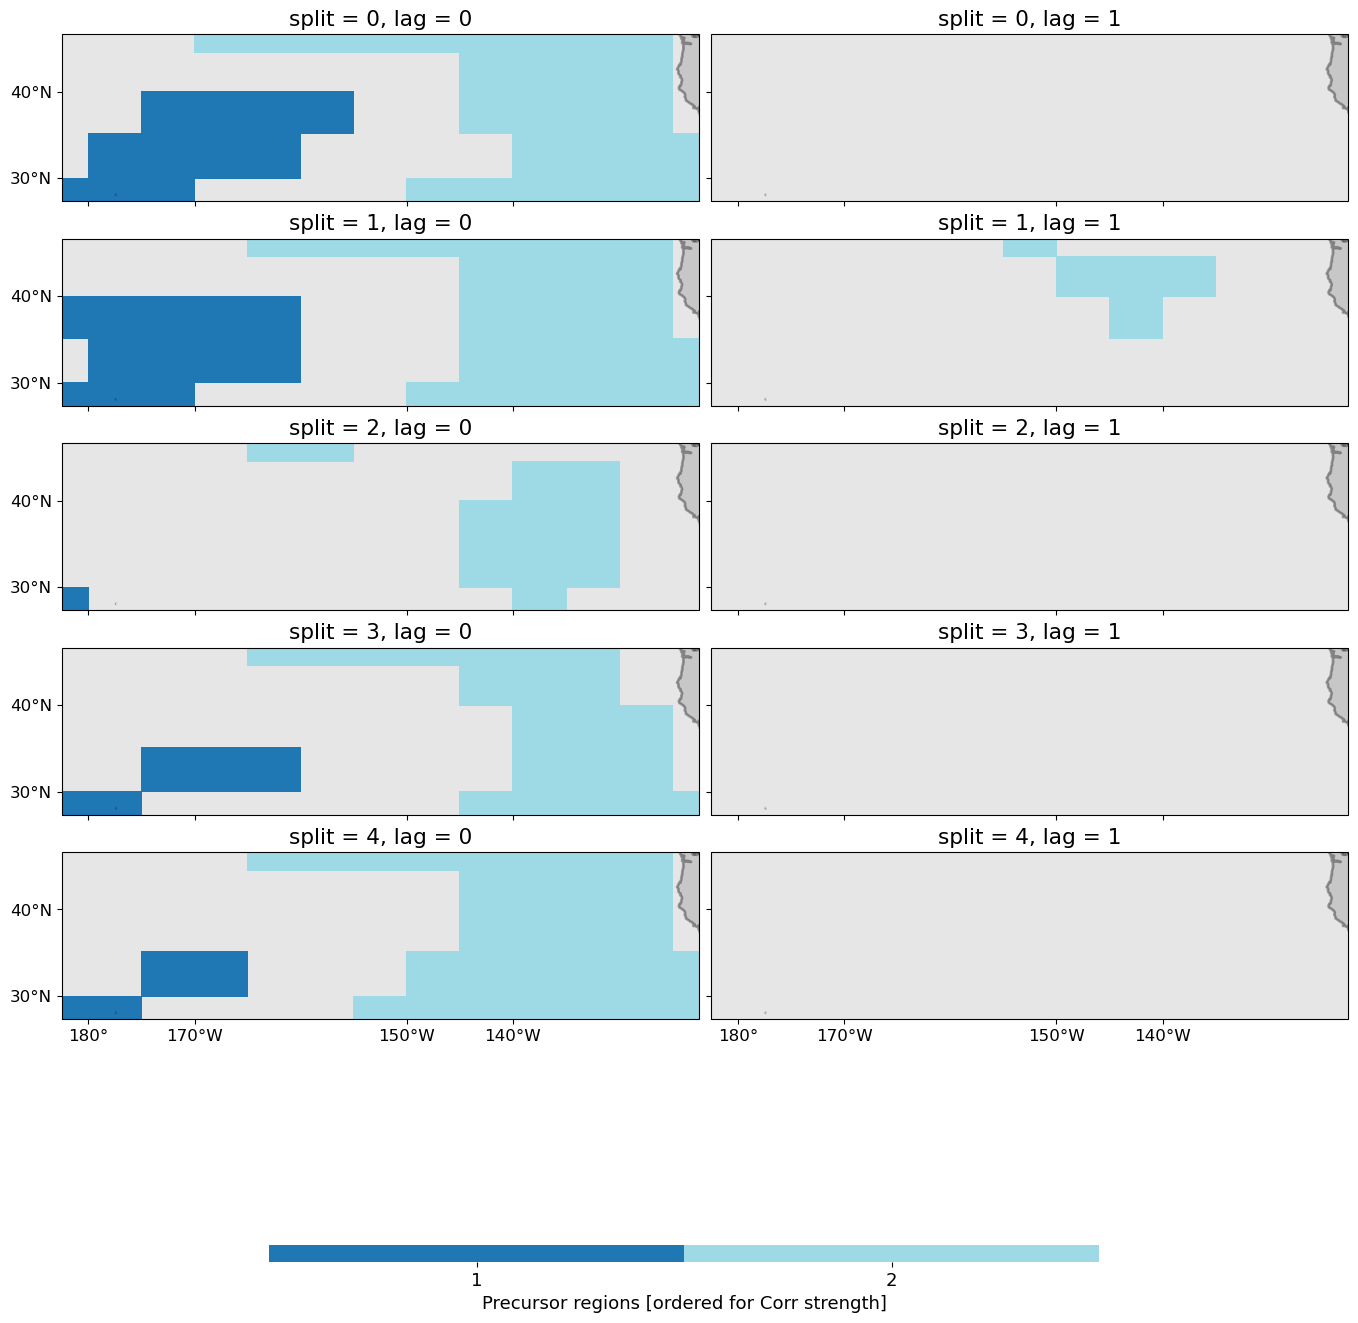

In [14]:
rg.quick_view_labels(mean=False) 

## Handling precursor regions

In [15]:
rg.get_ts_prec()
rg._df_count # how many times is each precursor regions found in the different training sets


Getting MI timeseries
There are [2, 3, 2, 2, 2] regions in total (list of different splits)


0..1..sst    5
0..2..sst    5
1..2..sst    1
dtype: int64

In [16]:
import find_precursors, plot_maps
df_prec_regions = find_precursors.labels_to_df(rg.list_for_MI[0].prec_labels)
df_prec_regions # center lat,lon coordinates and size (in number of gridcells)

,latitude,longitude,n_gridcells
1.0,33.653846,188.269231,13.0
2.0,37.983871,220.403226,31.0


## Splitting precursor regions

Plotting Corr maps sst_labels_init, split 0, lag 0

New label will become 3.0
Plotting Corr maps sst_labels_init, split 0, lag 0


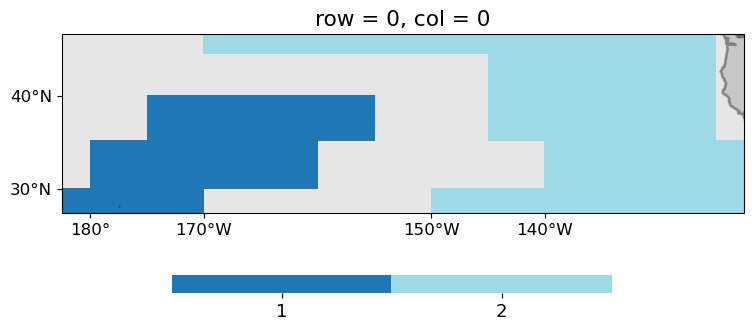

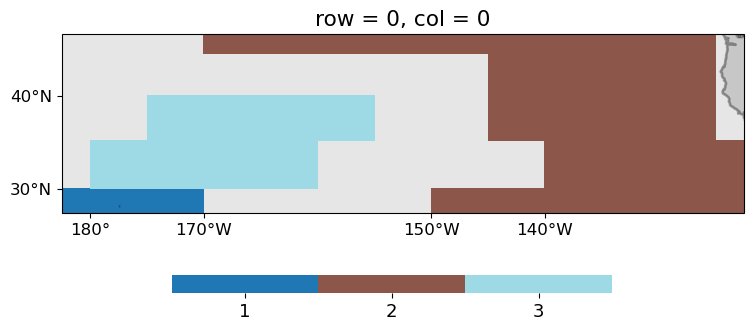

In [17]:
split = find_precursors.split_region_by_lonlat
new_labels, label = split(rg.list_for_MI[0].prec_labels, label=1,
             kwrgs_mask_latlon={'latmax':30}) # <- split region 1 by 30 degree latitude
rg.list_for_MI[0].prec_labels = new_labels

## Merging precursor regions
Merging what we just splitted.

Plotting Corr maps sst_labels_init, split 0, lag 0
Plotting Corr maps sst_labels_init, split 0, lag 1


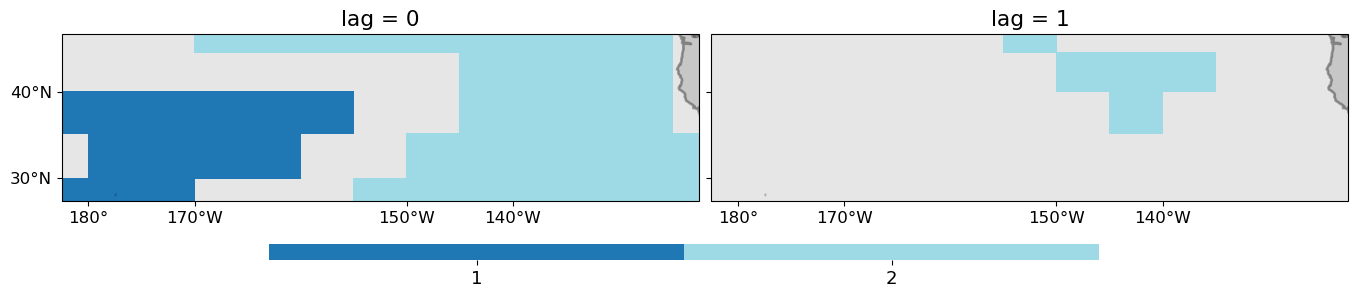

In [18]:
merge = find_precursors.merge_labels_within_lonlatbox
updated_labels = merge(rg.list_for_MI[0], lonlatbox=[170,200,25,40])
plot_maps.plot_labels(updated_labels.mean(dim='split'))                                                    

In [19]:
rg.list_for_MI[0].prec_labels = updated_labels # overwrite prec_labels in precur class

In [20]:
rg.get_ts_prec()


Getting MI timeseries
There are [2, 3, 2, 2, 2] regions in total (list of different splits)


In [21]:
rg.df_data

3ts  0..1..sst  0..2..sst  1..2..sst  TrainIsTrue  RV_mask
0 1979-01-01 -0.790402  -0.136218   0.267299        NaN         True     True
  1980-01-01  1.672683   0.446950  -0.241465        NaN         True     True
  1981-01-01  0.007222  -0.142051  -0.067447        NaN         True     True
  1982-01-01 -1.241871  -0.364502  -0.363096        NaN        False     True
  1983-01-01  1.724042  -0.112721  -0.434444        NaN         True     True
...                ...        ...        ...        ...          ...      ...
4 2014-01-01 -1.447113   0.030395   0.588808        NaN         True     True
  2015-01-01 -0.790045  -0.148892   0.932759        NaN         True     True
  2016-01-01  0.831930  -0.262468   0.241978        NaN         True     True
  2017-01-01 -1.041488  -0.120031   0.108529        NaN         True     True
  2018-01-01  0.265816  -0.635967  -0.118303        NaN         True     True

[200 rows x 6 columns]

## Train-test cross-validation and Response Variable mask handling

- The different train-test folds are organized in the first level index.
- Each fold contains precursor timeseries that were extracted from only training data.
- The Training data is specified by the TrainIsTrue mask.
- In seasonal mode the Target Variable mask is always True.
- No lag shifting of precursors, user needs to select timeseries with the desired lag (period mean) to feed into their analysis/forecast model.

## Functionality for Causal Inference
(Define your own Conditional Independence tests)

In [22]:
import wrapper_PCMCI
corr, pvals = wrapper_PCMCI.df_data_Parcorr(rg.df_data, 
                                            target='3ts',
                                            keys=['0..2..sst'],
                                            z_keys=['0..1..sst'])
pvals

,,0,1,2,3,4
x,z,,,,,
0..2..sst,0..1..sst,0.000746,0.000028,0.000019,0.000378,0.000047


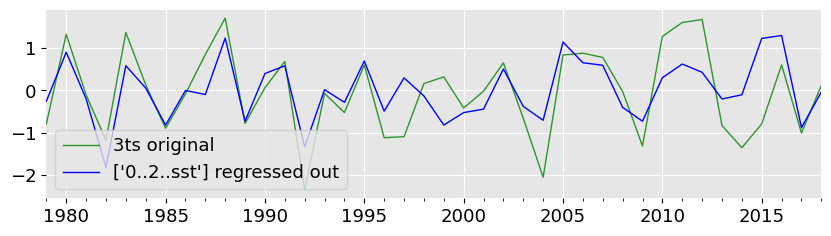

In [23]:
df_trans = rg.transform_df_data()

df_z_removed = wrapper_PCMCI.df_data_remove_z(df_trans,
                                              keys=['3ts'],
                                              z=['0..2..sst'])

## Causal Discovery using Tigramite not possible in seasonal mode
This is because there is no 'shared time-axis', hence, lags cannot be automatically handled. 
Lags should be dealt with mannually by selecting the timeseries you want to use/analyse.

# Forecasting pipeline 1

In [28]:
import func_models as fc_utils
from stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV


# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
# prediction = 'events' ; q = .66 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                   'kfold':5,
                   'alpha':alphas} # large a, strong regul.
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

    

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        
    
out = rg.fit_df_data_ridge(target=target_ts,
                            keys=['0..1..sst', '0..2..sst'],
                            fcmodel=model,
                            kwrgs_model=kwrgs_model,
                            transformer=False,
                            tau_min=0, tau_max=0) # <- lag should be zero
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 0
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
              'RMSE {:.2f}\n'.format(df_test_m.loc[0][lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_test_m.loc[0][lag]['MAE']),
              'corrcoef {:.2f}'.format(df_test_m.loc[0][lag]['corrcoef']),
              '\nTrain score\n',
              'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['MAE']),
              'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[lag]['corrcoef']))

Ridge 
 Test score
 RMSE 0.29
 MAE 0.28
 corrcoef 0.71 
Train score
 RMSE 0.38
 MAE 0.36
 corrcoef 0.78


In [29]:
predict

RV3ts         0
0 1979-01-01 -0.732095 -0.459662
  1980-01-01  1.346625  0.752030
  1981-01-01 -0.058941 -0.009751
  1982-01-01 -1.113113  0.193854
  1983-01-01  1.389969  0.515361
...                ...       ...
4 2014-01-01 -1.286326 -0.915799
  2015-01-01 -0.731794 -1.679651
  2016-01-01  0.637071 -0.659861
  2017-01-01 -0.943999 -0.284364
  2018-01-01  0.159300 -0.469219

[200 rows x 2 columns]

In [30]:
m = model_lags['lag_0']['split_0']
m # if prediction == 'continuous', this show the GridSearchCV output, else it shows the fitted logistic model.

GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, 4, 3, 1, 1, 2, 1, 1, 4, 0, 4, 0, 3, 3, 0, 2, 0, 3, 2, 2, 0,
       4, 1, 1, 1, 4, 3, 4, 3, 2, 2])),
             estimator=Ridge(),
             param_grid={'alpha': [1e-20, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   1.023292992280754, 1.2994213556374827,
                                   1.6500610013202277, 2.0953182709100417,
                                   2.6607250597988097, 3.378702864441983,
                                   4.290421892388855, 5.448161839981667,
                                   6.918309709189366, 8.78516656407272,
                                   11.155781513508526, 14.166090109900438,
                                   17.988709151287882, 22.84283485557348,
                                   29.006811986931545, 36.834094671918606,
                                   46.77351412871984, 59.39501549952438,
                                   75.42233958475711, 95.77452351172

In [31]:
if prediction == 'continuous':
    print(m.cv_results_['mean_test_score'])

[-0.55257275 -0.55257277 -0.55257301 -0.55257538 -0.55259925 -0.5528512
 -0.55715622 -0.55725496 -0.55836574 -0.55963454 -0.56146037 -0.56597511
 -0.57648965 -0.58844391 -0.60116253 -0.61612599 -0.63711863 -0.65769551
 -0.67664324 -0.69581965 -0.71408093 -0.73055739 -0.74479586 -0.75676311
 -0.76675604 -0.77495425 -0.78162604 -0.78702    -0.79135771 -0.79483106
 -0.79760275 -0.79980845]


<AxesSubplot:>

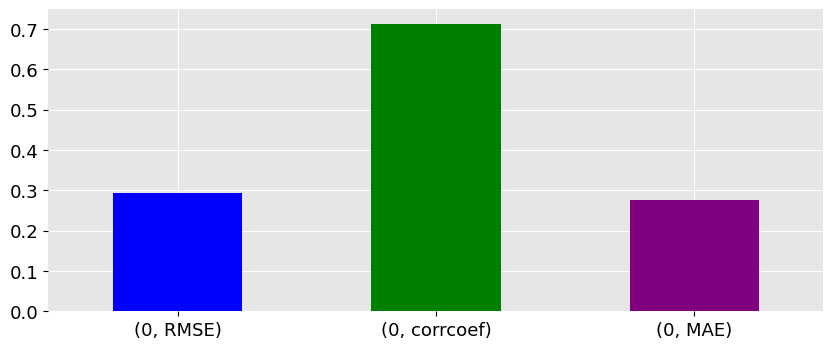

In [32]:
df_test_m.loc[0].plot.bar(rot=0, color=['blue', 'green', 'purple'], figsize=(10,4))

/Users/semvijverberg/miniconda3/envs/RGCPD1/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


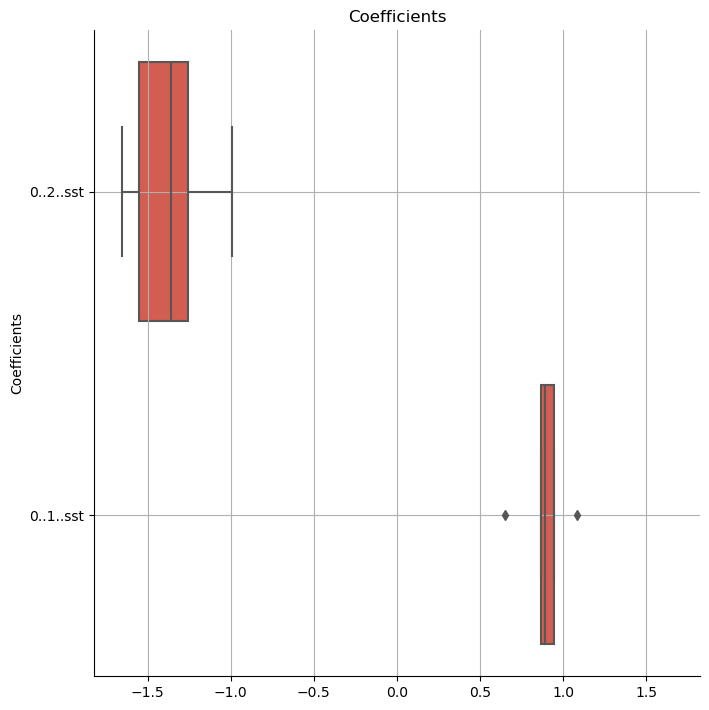

In [34]:
from stat_models import plot_importances
df_weights, fig = plot_importances(models_splits_lags=model_lags, lag=0)